In [5]:
#!pip install pandas
#!pip install bottleneck
#pip install rfpimp

     ---------------------------------------- 0.0/109.9 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.9 kB ? eta -:--:--
     ---------- -------------------------- 30.7/109.9 kB 325.1 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/109.9 kB 326.8 kB/s eta 0:00:01
     --------------------------------- -- 102.4/109.9 kB 653.6 kB/s eta 0:00:01
     ------------------------------------ 109.9/109.9 kB 579.3 kB/s eta 0:00:00


In [ ]:
#input data for all cells in this notebook are in the form of a .csv file. 
#the first row of this file is headers for each column (usually behavior names and group conditions).
#each column contains the z-score for the behavior (each row is a different mouse/trial). 
#the group/condition column contains 0 or 1 (representing control and experimental)

C:\Users\ajgra\anaconda3\envs\mmpy\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\base.py:444: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


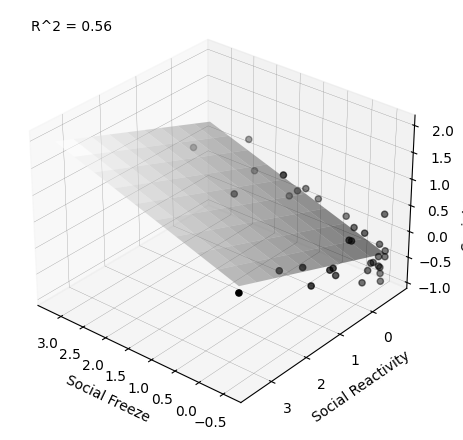

In [39]:
#3D graph of multi-linear regression 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Read the CSV file
file = 'zscores_females_excludingNAN.csv'
df = pd.read_csv(file)

# Extracting features and target variable
X = df[['social freeze', 'social reactivity']]
y = df['social anxiety']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate R^2 value
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

# Create a meshgrid for 3D plotting
x0_min, x0_max = X['social freeze'].min(), X['social freeze'].max()
x1_min, x1_max = X['social reactivity'].min(), X['social reactivity'].max()
x0, x1 = np.meshgrid(np.linspace(x0_min, x0_max, 10), np.linspace(x1_min, x1_max, 10))

# Reshape meshgrid for prediction
X_test = np.c_[x0.ravel(), x1.ravel()]

# Predict the values
y_pred = model.predict(X_test)

# Reshape y_pred to match the shape of X0, X1
y_pred = y_pred.reshape(x0.shape)

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['social freeze'], X['social reactivity'], y, color='black') #, label='Actual data'
ax.plot_surface(x0, x1, y_pred, cmap='grey', alpha=0.5)  # Adjusting the surface plot appearance
#i like "grey"

ax.set_xlabel('Social Freeze')
ax.set_ylabel('Social Reactivity')
ax.set_zlabel('Social Anxiety')

# Manually adjust the position of the subplot to accommodate the y-axis label
position = ax.get_position()
ax.set_position([position.x0, position.y0, position.width * 0.9, position.height])

# Add R^2 value to the plot
ax.text2D(0.05, 0.95, f'R^2 = {r_squared:.2f}', transform=ax.transAxes)

# Adjusting the appearance of grid lines
ax.xaxis._axinfo["grid"].update(color='gray', linestyle='-', linewidth=0.2)
ax.yaxis._axinfo["grid"].update(color='gray', linestyle='-', linewidth=0.2)
ax.zaxis._axinfo["grid"].update(color='gray', linestyle='-', linewidth=0.2)

# Adjusting the viewing angle
ax.view_init(elev=30, azim=130)

plt.savefig("females_SA_zscores_regressionGraph.png")
#plt.legend()
plt.show()


In [4]:
#fitting a multi-linear regression model
import pandas as pd
import numpy as np
from sklearn import linear_model

file = 'zscores_females_excludingNAN.csv'
df = pd.read_csv(file)

features = ['social freeze', 'L2F testPhase',
            'tail sniff', 'social reactivity', 'USV slope inverse', 
            'social initiation inverse', 'first tube approach','reverse in tube', 
            'socialChamber_time(%)_testPhase', 'face sniff']
target = 'social anxiety'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
print(model.coef_) #these are the regression coefficient for each featured variable
print(model.intercept_) #this is the intercept
print(model.score(X, y)) #this is the R^2 value for the model

[0.10000028 0.09999997 0.09999928 0.09999924 0.10000023 0.09999912
 0.10000154 0.09999895 0.10000047 0.09999988]
-1.2929836003088002e-07
0.9999999999908759


In [6]:
#fit multi-logistic regression model
#this splits data set into 80% used for model and 20% used for testing. only use with high sample size to avoid over-fitting
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

file = 'zscores_females_excludingNAN.csv'
df = pd.read_csv(file)

features = ['social freeze', 'L2F testPhase',
            'tail sniff', 'social reactivity', 'USV slope inverse', 
            'social initiation inverse', 'first tube approach','reverse in tube', 
            'socialChamber_time(%)_testPhase', 'face sniff']
target = 'Housing'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

# Access coefficients and intercept
print(logistic_model.coef_)       # These are the regression coefficients for each feature variable
print(logistic_model.intercept_)  # This is the intercept


Accuracy on the test set: 0.5714
[[ 1.6437981   0.5372338  -0.298496    1.26994162  0.44976497  0.20819834
   0.03940905  0.45700794 -0.23614767  0.39863754]]
[0.02779028]


In [2]:
#fit multi-logistic regression model
#this uses 100% of the data for fitting the model. use to report "training accuracy".

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

file = 'male_socialArousal_scores.csv'
df = pd.read_csv(file)

features = ['aggression', 'socialReactivity', 'tonality', 
            'socialInitiation', 'firstTubeApproach', 'allSniff']
target = 'Housing'

X = df[features]
y = df[target]

# Create and train a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Predict on the test set
y_pred = logistic_model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

# Access coefficients and intercept
print(logistic_model.coef_)       # These are the regression coefficients for each feature variable
print(logistic_model.intercept_)  # This is the intercept


Accuracy on the test set: 0.7500
[[0.03552555 0.27309952 0.77699163 0.92748601 0.24283995 0.20566424]]
[0.04345559]


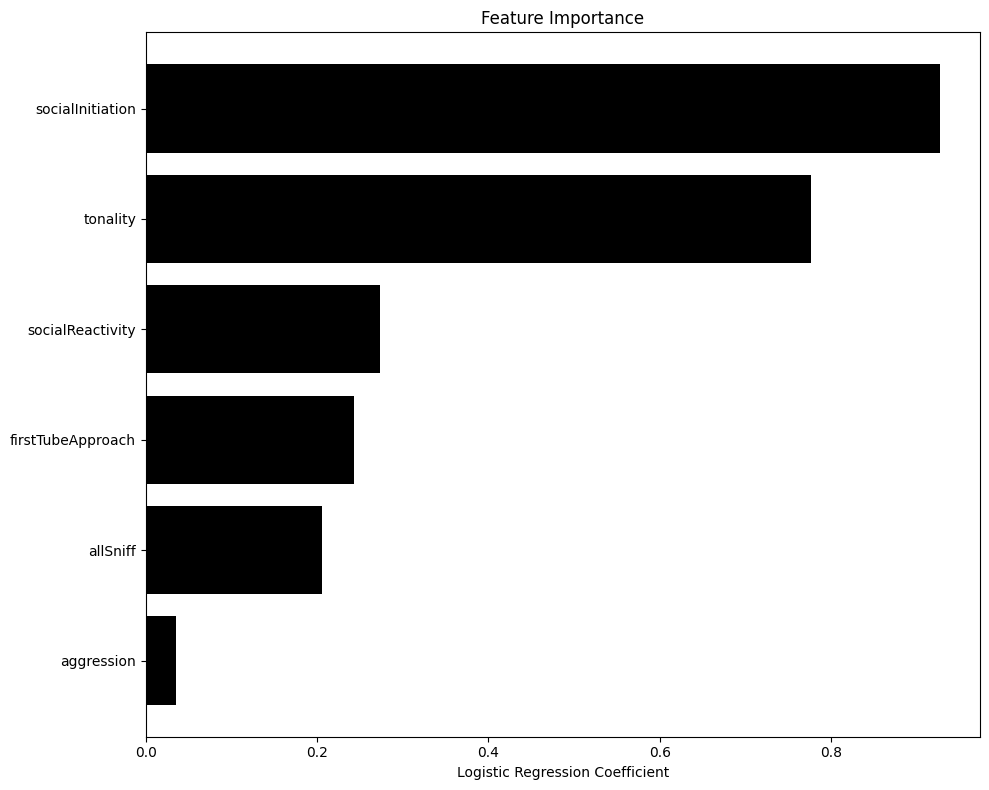

In [4]:
#create graph of feature importance (coefficients of logistic regression)
import matplotlib.pyplot as plt

# Given data
features = ['aggression', 'socialReactivity', 'tonality', 
            'socialInitiation', 'firstTubeApproach', 'allSniff'] 

values = [[0.03552555, 0.27309952, 0.77699163, 0.92748601, 0.24283995, 0.20566424]] #enter in the multi-logistic regression coefficients for each feature

# Convert the values to a flat list
values = values[0]

# Sort features and values based on values in ascending order
sorted_features, sorted_values = zip(*sorted(zip(features, values), key=lambda x: x[1]))

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))  # Increase the figure height

ax.barh(sorted_features, sorted_values, color='black')
ax.set_xlabel('Logistic Regression Coefficient')
ax.set_title('Feature Importance')

# Adjust layout to fit all y-axis labels
plt.tight_layout()

# Save the plot as a .png file
plt.savefig('feature_importance_males_arousal1.png')

plt.show()


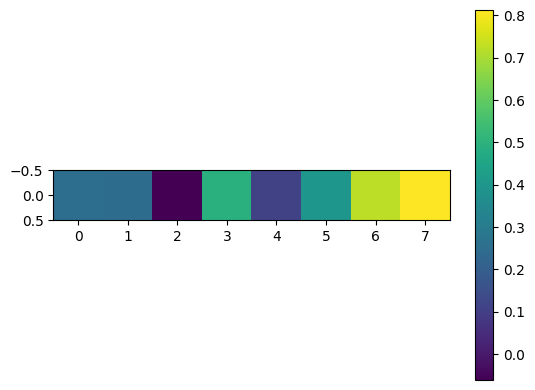

In [7]:
#create color diagram to corresponding logistic regression coefficients
import matplotlib.pyplot as plt
import numpy as np

# Provided values
values = [[ 0.25232124,  0.24858568, -0.0617249,   0.49174473,  0.10893343,  0.39613528,
   0.72335835,  0.81144388]]
# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using imshow
heatmap = ax.imshow(values, cmap='viridis', interpolation='nearest') #to change colors, set cmap to something else, like cmap='coolwarm'. 
#https://matplotlib.org/stable/users/explain/colors/colormaps.html

# Display the colorbar
cbar = plt.colorbar(heatmap)

plt.savefig("heatmap_mmpy_regionDuration_zScore.png")

# Show the plot
plt.show()

